This is a simple pytorch to teach you how to use pytorch. Pytorch is widely used for deep learning and it supports automatically gradient computing. 

Let see how pytorch works.

## 1. How to Autograd

Since pytorch can compute derivatives automatically (autograd), we show 2 examples of the autograd of pytorch.

### 1.1 Autograd from Scratch

In [2]:
# Import modules
import torch # pytorch core module
import torchvision # pytorch computer vision module
import torch.nn as nn # pytorch standard net module
import numpy as np
import torchvision.transforms as transforms # scaling function

Let us start with the first example, we compute the gradients of `y = w * x + b`

In [3]:
# Create tensors.
x = torch.tensor(1., requires_grad=True) # set requires_grad if compute 
w = torch.tensor(2., requires_grad=True) #                  derivatives
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


>**Remarks:** After you build the computation graph, you can compute gradients by calling `.backward()` for any equation. The attribute `grad` shows the partial derivatives. For example, `x.grad` shows partial derivative of `y` with respect to `x`.

### 1.2 Autograd with nn.Linear

Actually `y = w * x + b` is a simple linear model. We use `nn.Linear` in this example to show how to create a linear model using pytorch standard module:

In [6]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.3108, -0.2729, -0.5598],
        [-0.1254, -0.0949, -0.0153]], requires_grad=True)
b:  Parameter containing:
tensor([-0.1089, -0.1291], requires_grad=True)


>**Remarks**: `w` and `b` are the weights of the linear model. They are intialized with random variables. 


Now we show how to use the linear model `w*x +b` to approximate `y`:

In [7]:
# Build loss function and optimizer.
criterion = nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # Stocastic 
                                                    #Gradient Descend 

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  0.7807512283325195


**Remarks:** `MSELOSS()` is the loss function called Mean Square Error. `SDG` is the optimizer called Stocastic Gradient Descend. We use the loss function to compute the error between the predicted value of the linear model and ground truth.

Now we optimze the linear model to make its predicted value closed to `y` as much as possible. Let us do one-step optimization:

In [8]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

dL/dw:  tensor([[-0.3451,  0.1039, -0.6926],
        [-0.5663,  0.1949, -0.7459]])
dL/db:  tensor([-0.4857, -0.4996])
loss after 1 step optimization:  0.7608612775802612


Let us do 10-step optimization:

In [9]:
for i in range(10):
    optimizer.step()

# Print out the loss after 10-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 10 step optimization: ', loss.item())

loss after 1 step optimization:  0.585281252861023


**Remarks:** Now you can find that the as the steps of optimization increases, the loss decreases. And that means the prediction is more accurate with optimization

## 2.How to create torch tensor from numpy

Now we show how to create a tensor from numpy array:

In [14]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print(f'x: {x}')
print(f'y: {y}')
print(f'z: {z}')

x: [[1 2]
 [3 4]]
y: tensor([[1, 2],
        [3, 4]])
z: [[1 2]
 [3 4]]


## 3. Deep Learning for MNIST dataset

MNIST dataset is a large database for handwritten digits. Here is the [WIKI link](https://en.wikipedia.org/wiki/MNIST_database). In AI area, MNIST dataset is like "HelloWorld" Dataset for the classfication task.

The MNIST is a bunch of gray-scale handwritten digits with outputs that are ranging from 0, 1, 2, 3 and so on through 9. Each of these images is 28 by 28 pixels in size and the goal is to identify what the number is in these images.

Having a detailed look at the documentation, each of the images is labeled with the digit that’s in that image. To access this dataset we will use the Torchvision package which came along when we were installing PyTorch. This library provides us with datasets, and models for tackling computer vision problems.


>*Do you know that 25 years ago MNIST was the hardest problem in Computer Vision at the time? 🙂 check out this amazing video of Yann LeCun* 
“”
[![https://lh3.googleusercontent.com/proxy/3QXetsAzSG6rPRsrhUYpNTJc06vMTCMER6vqrSIDqyLBWIyE286xmNgjbYzvH2mf15a3bOGnAUeEPAnkwdE0iDfzKRSDHw4bPH83F3P-WTSfWwqbvTYdwyk](http://img.youtube.com/vi/YOUTUBE_VIDEO_ID_HERE/0.jpg)](https://youtu.be/FwFduRA_L6Q)

### 3.1 Download Mnist Dataset (Optional)

You can **skip** this process since Mnist dataset have been included in our github repository. Here just show you how to download from Internet if you do not have local MNIST dataset.

In [19]:
## install wget  (uncomment the line based on your local computer system)

!brew install wget # for mac
# !sudo apt-get install wget # for ubuntu

Error: 
  homebrew-core is a shallow clone.
To `brew update`, first run:
  git -C /usr/local/Homebrew/Library/Taps/homebrew/homebrew-core fetch --unshallow
This command may take a few minutes to run due to the large size of the repository.
This restriction has been made on GitHub's request because updating shallow
clones is an extremely expensive operation due to the tree layout and traffic of
Homebrew/homebrew-core and Homebrew/homebrew-cask. We don't do this for you
automatically to avoid repeatedly performing an expensive unshallow operation in
CI systems (which should instead be fixed to not use shallow clones). Sorry for
the inconvenience!
==> Downloading https://homebrew.bintray.com/bottles/wget-1.21.1.big_sur.bottle.
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/e6ea2a50b8196206f7072
######################################################################## 100.0%
==> Pouring wget-1.21.1.big_sur.bottle.tar.gz
🍺  /usr/local/Cellar/wget/1.21.1: 88 files, 4MB
==> `brew c

In [20]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz # wget download dataset
!tar -zxvf MNIST.tar.gz # unzip the downloaded file

--2021-03-27 16:03:28--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-27 16:03:29--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [                <=> ]  33.20M  3.59MB/s    in 20s     

2021-03-27 16:03:50 (1.69 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

x MNIST/
x MNIST/raw/
x MNIST/raw/train-labels-idx1-ubyte
x MNIST/raw/t10k-labels-idx1-ubyte.gz
x MNIST/raw/t10k-labels-idx1-ubyte
x MNIST/raw/t10k-images-idx3-ubyte.gz
x MNIST/raw/train-images-idx3-ubyte
x MNIST/raw/train-labels-idx1-ubyte.gz
x MNIST/raw/t10k-images-idx3-u

## 3.2 Load Mnist Dataset

In [ ]:
# load python modules
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline 

In [30]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [31]:
## load Mnist dataset

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./', 
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


Let us check the input and the shape of input

In [38]:
for images, labels in train_loader:
    print(images[0]) # print the input data for the 1st data point
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [39]:
for images, labels in train_loader:
    print(images[0].shape) # print the input data for the 1st data point
    break

torch.Size([1, 28, 28])


**Remarks:** The dimension of input data is 1x28x28, which is 3 dimensional. 

In [47]:
for images, labels in train_loader:
    for j in range(5):
        print(labels[j]) # print the Output data for the 1st data point
    break

tensor(8)
tensor(0)
tensor(7)
tensor(9)
tensor(1)


**Remarks:** The output is 1 dimensional integer data in the range of 0~9.

Let visualize the input data to get some insights:

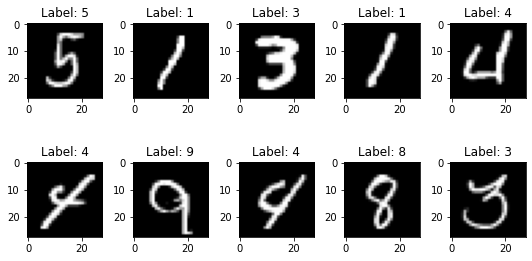

In [32]:
## plot the first 10 data in the dataset
for images, labels in train_loader:
    num_row = 2
    num_col = 5
    fig, axes = plt.subplots(num_row, num_col, 
                             figsize=(1.5*num_col,2*num_row))
    for i in range(10):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i][0], cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    break

**Remarks:** The input data is easy for human to recogize, but it is extremely hard for machine to recogize. So our job is to endow machine with the ability of understanding the relationship between the numbers of input and output data.

Let us define a Feedforward neural network:

## 3.3 Feedforward Neural Network

In [33]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [51]:
## create instances

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

Now we define a function to evaluate our neural network performance on test dataset:

In [62]:
def evaluate():
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


In [53]:
evaluate()

Accuracy of the network on the 10000 test images: 10.85 %


Looks terrible for the accuracy because we initialize the parameters with random numbers. To improve the accuracy, we need to learn the paramters using optimization:

In [35]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, 
                           loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.3837
Epoch [1/5], Step [200/600], Loss: 0.3099
Epoch [1/5], Step [300/600], Loss: 0.1302
Epoch [1/5], Step [400/600], Loss: 0.1870
Epoch [1/5], Step [500/600], Loss: 0.1676
Epoch [1/5], Step [600/600], Loss: 0.1519
Epoch [2/5], Step [100/600], Loss: 0.2768
Epoch [2/5], Step [200/600], Loss: 0.0583
Epoch [2/5], Step [300/600], Loss: 0.0677
Epoch [2/5], Step [400/600], Loss: 0.1094
Epoch [2/5], Step [500/600], Loss: 0.1060
Epoch [2/5], Step [600/600], Loss: 0.1679
Epoch [3/5], Step [100/600], Loss: 0.0283
Epoch [3/5], Step [200/600], Loss: 0.1580
Epoch [3/5], Step [300/600], Loss: 0.0783
Epoch [3/5], Step [400/600], Loss: 0.1140
Epoch [3/5], Step [500/600], Loss: 0.0761
Epoch [3/5], Step [600/600], Loss: 0.0811
Epoch [4/5], Step [100/600], Loss: 0.0680
Epoch [4/5], Step [200/600], Loss: 0.0233
Epoch [4/5], Step [300/600], Loss: 0.0454
Epoch [4/5], Step [400/600], Loss: 0.0668
Epoch [4/5], Step [500/600], Loss: 0.0959
Epoch [4/5], Step [600/600], Loss:

In [36]:
evalute()

Accuracy of the network on the 10000 test images: 97.85 %


Now you see that the accuracy up to 97% after optimzation

In [54]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 3.5 Convolution Neural Network

In [57]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [58]:
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [59]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.0933
Epoch [1/5], Step [200/600], Loss: 0.0695
Epoch [1/5], Step [300/600], Loss: 0.0435
Epoch [1/5], Step [400/600], Loss: 0.0791
Epoch [1/5], Step [500/600], Loss: 0.0380
Epoch [1/5], Step [600/600], Loss: 0.0154
Epoch [2/5], Step [100/600], Loss: 0.1077
Epoch [2/5], Step [200/600], Loss: 0.0434
Epoch [2/5], Step [300/600], Loss: 0.0267
Epoch [2/5], Step [400/600], Loss: 0.0294
Epoch [2/5], Step [500/600], Loss: 0.0244
Epoch [2/5], Step [600/600], Loss: 0.0290
Epoch [3/5], Step [100/600], Loss: 0.0154
Epoch [3/5], Step [200/600], Loss: 0.0265
Epoch [3/5], Step [300/600], Loss: 0.0073
Epoch [3/5], Step [400/600], Loss: 0.0124
Epoch [3/5], Step [500/600], Loss: 0.0088
Epoch [3/5], Step [600/600], Loss: 0.1490
Epoch [4/5], Step [100/600], Loss: 0.1029
Epoch [4/5], Step [200/600], Loss: 0.0267
Epoch [4/5], Step [300/600], Loss: 0.0501
Epoch [4/5], Step [400/600], Loss: 0.1115
Epoch [4/5], Step [500/600], Loss: 0.0445
Epoch [4/5], Step [600/600], Loss:

In [68]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
def evaluate():
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
evaluate()

Test Accuracy of the model on the 10000 test images: 99.01 %
